# Lab 5
## Feature expansion and regularization in sklearn 
This lab teaches you feature expansion and regularization in sklearn


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.preprocessing
import sklearn.linear_model
from sklearn.model_selection import train_test_split, cross_val_score

## Polynomial expansion 

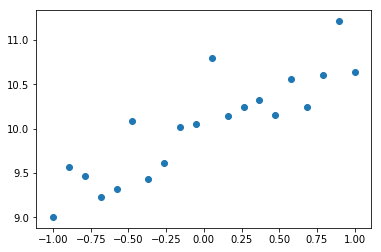

In [6]:
# Let's load a data set and look at it.
df = pd.read_csv('regression_data.csv')
df.head()
plt.scatter(df['x'], df['y'])

In [17]:
# Build a design matrix with polynomial expansion on X
X = df['x']
y = df['y']
poly = sklearn.preprocessing.PolynomialFeatures()
new = poly.fit_transform(df)

XX = sklearn.preprocessing.PolynomialFeatures(include_bias=False).fit_transform()

In [28]:
## Apply Ridge regression
ridge_model = sk.linear_model.ridge.Ridge(alpha=1.0)
ridge_model.fit(XX, df['y'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

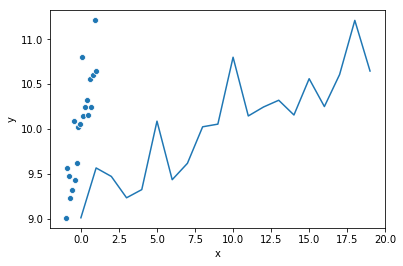

In [35]:
# Now fit a standard linear model to the data and plot prediction li
linear_model = sk.linear_model.LinearRegression()
linear_model.fit(XX, df['y'])
ax=sns.scatterplot(x=df.x,y=df.y)
pred_lin = linear_model.predict(XX)
plt.plot(pred_lin)

In [ ]:
# This seems very wiggly. Could we do better with Ridge regression? 
# Let's regulatrize a lot


### Fix the intercept problem

In [ ]:
# What happend? 
# The problem is that the Ridge coefficient was also applied to the intercept
# Sometimes this is desired, sometimes not. In this case we want to not to include the intercept 
# into the regressors that should be regularized 


In [ ]:
# If we set fit_intercept = True, ridge regression fits the intercept 


In [ ]:
# Also redo the linear regression 


In [ ]:
# Now inspect the coefficients: No explicit intercept is fitted - ridge coefficients are smaller 


In [ ]:
# Now let's try a lower alpha (i.e. regularization coefficient) 

### How to set the regularization coefficent? 

In [ ]:
# So, how should we tune the regularization coefficient? 
# Let's use crossvalidation 


In [ ]:
# Systematically vary the ridge coeficient on a log-scale


In [ ]:
# Determine lowest value 


In [ ]:
# So low let's look at the crossvalidation error for the best setting of lambda 


### Written Question
can we use this crossvalidated error as a prediction for the test error? 

### Lasso 

In [ ]:
# Let's do lasso on the same model 


In [ ]:
# Let's check the coefficients. What do you notice compared to the ridge? 


### Lasso Path 

In [ ]:
# Get a full path for Lasso



colors = ['b', 'r', 'g', 'c', 'k','c']
neg_log_lambda = -np.log(lambda_lasso)
for i in range(6):
    l1 = plt.plot(neg_log_lambda, coefs_lasso[i,], c=colors[i])
